In [1]:
# Linear regression is a satistical model used to predict the 
# relationship between independent and dependent variables.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
companies = pd.read_csv(r"D:\CSV Files\1000_Companies.csv")
X = companies.iloc[:, :-1].values #show all rows except the last column
y = companies.iloc[:, 4].values #show all rows and last column
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

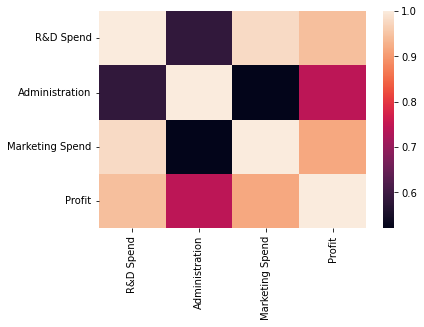

In [3]:
# Data visualization
# Building the correlation matrix

sns.heatmap(companies.corr())

In [4]:
# Encoding the categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3]) #look at all rows and fit & transform 3rd row

ct = ColumnTransformer([('State', OneHotEncoder(),[3])], remainder='passthrough')
X = ct.fit_transform(X)

In [5]:
# # Avoiding the Dummy variable Trap
# when we encode the columns we get two columns but we  want only one column

X = X[:, 1:]

In [6]:
# Splitting the dataset into the training & testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [7]:
# Fitting Multiple regression model to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [8]:
# Predicting the test set results

y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187362,  94894.67836972, 175680.86725609,
        83411.73042089, 110571.90200074, 132145.22936439,  91473.37719687,
       164597.05380605,  53222.82667403,  66950.19050991, 150566.43987004,
       126915.20858596,  59337.85971052, 177513.9105306 ,  75316.28143052,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645082,
       118845.0325269 ,  85669.95112229, 180992.59396142,  84145.08220146,
       105005.83769214, 101233.56772747,  53831.07669093,  56881.41475226,
        68896.39346906, 210040.00765881, 120778.72270894, 111724.87157655,
       101487.90541518, 137959.02649623,  63969.95996745, 108857.91214127,
       186014.72531986, 171442.64130746, 174644.26529203, 117671.49128195,
        96731.37857434, 165452.25779408, 107724.34331255,  50194.54176915,
       116513.89532179,  58632.48986822, 158416.46827609,  78541.48521611,
       159727.66671742, 131137.87699643, 184880.70924514, 174609.08266878,
        93745.66352059,  

In [16]:
# Calculating the Coefficients and Intercepts
  #calculate the coefficients
regressor.coef_

array([-8.80536598e+02, -6.98169073e+02,  5.25845857e-01,  8.44390881e-01,
        1.07574255e-01])

In [17]:
# Calculating the Intercepts
regressor.intercept_

-51035.22972400588

In [18]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112695892268762